# AST1420 - Assignment 1
## Emaad Paracha - 1003687236

In [1]:
import matplotlib.pyplot as plt
import math
from galpy.orbit import Orbit
from scipy.integrate import odeint
from scipy.integrate import quad
from scipy.misc import derivative
import numpy as np

## Question 1

### Part a

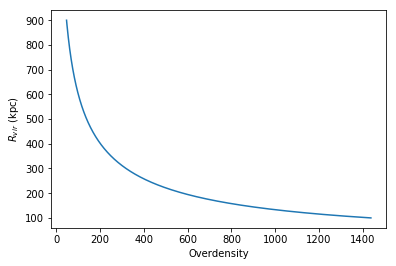

In [2]:
p0 = 0.0035 #Msun/pc^-3
a = 16*(10*3) #pc
H0 = 70/(10**6) #km/s/pc
G = 4.3*(10**-3) #pc*(km/s)^2/Msun
pcrit = ((3*(H0**2))/(8*math.pi*G)) 

rvir = []
i = 1
while i < (9):
    rvir.append(i*(10**2))
    i += 0.01
    
delta = []
for r in rvir:
    c = r/a
    overdensity = (((3*(p0))/(c**3))*((math.log(1+c)) - ((c)/(1+c))))/(pcrit*100)
    delta.append(overdensity)
    
plt.plot(delta,rvir)

plt.xlabel("Overdensity")
plt.ylabel("$R_{vir}$ (kpc)")
plt.show()

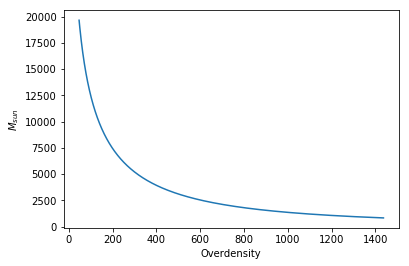

In [3]:
Mvir = []

for m in range(len(rvir)):
    solveforM = ((4*math.pi*(rvir[m]**3))/3)*pcrit*delta[m]
    Mvir.append(solveforM)
    
plt.plot(delta,Mvir)

plt.xlabel("Overdensity")
plt.ylabel("$M_{sun}$")
plt.show()

The figures above show an exponential decay type relationship for both Mass and Radius with Overdensity, which correlates well with the formulae.

## Question 3

### Part a

Given: $$\frac{d}{dr}(r^{2}\frac{d\ln\rho}{dr}) = -\frac{4\pi G}{\sigma^{2}}r^{2}\rho$$

Substituting in $y = \ln\tilde{\rho}/\rho_{0}$ and $x = r/r_{0}$ we get:

$$\frac{d}{dr}((xr_{0})^{2}\frac{dy\rho_0}{dr}) = -\frac{4\pi G}{\sigma^{2}}(xr_{0})^{2}e^{y\rho_0}$$

Collecting constants within the derivate, using the product rule, and noticing that we can replace $dr$ with $dx$, we have:

$$r_{0}^{2}\rho_0(\frac{dx^{2}}{dx}\frac{dy}{dx} + x^{2}\frac{d^{2}y}{dx^{2}}) = -\frac{4\pi G}{\sigma^{2}}(xr_{0})^{2}e^{y\rho_0}$$

Further simplification:

$$2\frac{dy}{dx} + x\frac{d^{2}y}{dx^{2}} = -\frac{4\pi G}{\sigma^{2}\rho_{0}}xe^{y\rho_0}$$

Thus, we can rewrite our solution(s) to be $y = f(x)$ or $\frac{\rho}{\rho_{0}} = f(\frac{r}{r_0})$ or, simplifying: $$\rho(r) = \rho_{0}f(\frac{r}{r_0}) = \rho_{0}f(x)$$

### Part b

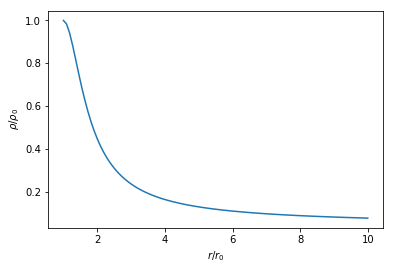

In [4]:
def isosphere(y,x,p00,Gpi44):
    yx, h = y
    dydt = [h, (((-Gpi44/p00)*x*(math.e**(yx*p00))) - 2*h)/x]
    return dydt

p0 = 3
Gpi4 = 4*math.pi

y0 = [0,0]
x = np.linspace(1,10,100)

sol = odeint(isosphere, y0, x, args=(p0,Gpi4))

plt.ylabel("$ρ/ρ_{0}}$")
plt.xlabel("$r/r_{0}$")
plt.plot(x,(math.e**sol[:,0]))
plt.show()

### Part c

For the case where $\beta = 0$, the integrand in the power of the exponential is $0$, thus, we can simplify the $e$ term to $1$. Therefore, $\sigma^{2}_{r}$ reduces to just $\Phi$

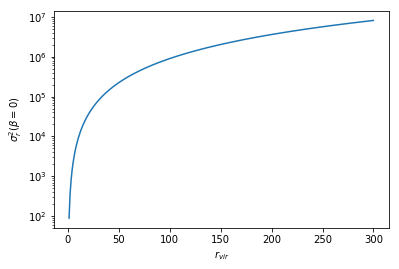

In [5]:
c = 11.5 #concentration
Mvir = 7*(10**11) #Msun
delta = 200
G = 4.3*10**-3 #pc*(km/s)^2*Msun^-1

def phi(r):
    return 4*math.pi*G*((r**2)/(c**3))*math.log(1+c)

def sigr(r):
    return phi(r)

rad = []
for i in range(1,301):
    rad.append(i)
    i += 0.5
    
sigB0 = []
for radius in rad:
    sigB0.append(sigr(radius*(10**3)))

plt.plot(rad,sigB0)

plt.yscale("log")

plt.xlabel("$r_{vir}$")
plt.ylabel("$σ^{2}_{r} (β = 0)$")

plt.show()
    